In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
x = np.arange(0.00001, 1, 0.00001)
y = (-1) * x * np.log(x)
ymax = max(y)
print(ymax)

0.3678794411710179


In [2]:
def hard_example_sampler(indices_by_ranks, selection_pressure=10):
	N = len(indices_by_ranks)
	x = np.arange(1, N+1)
	x_exp = np.exp(-x*selection_pressure/N)
	x_cum = x_exp.sum()
	p_i_array = x_exp / x_cum

	plt.plot(p_i_array)

	# select 1 index based on probability
	p_i = np.random.uniform(low=p_i_array.min(), high=p_i_array.max(), size=1)[0]
	p_index = np.argwhere(p_i_array < p_i)[0,0]
	data_index = indices_by_ranks[p_index]
	return data_index


69


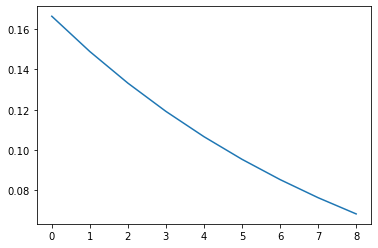

In [4]:
indices_by_ranks = [68, 13,  7,  5, 51,  8, 91, 69, 49]
idx = hard_example_sampler(indices_by_ranks, selection_pressure=1)
print(idx)